# Introduction 
Alzheimer’s is a progressive disease, where dementia symptoms gradually worsen over a number of years. In its early stages, memory loss is mild, but with late-stage Alzheimer’s, individuals lose the ability to carry on a conversation and respond to their environment.
Although current Alzheimer’s treatments cannot stop Alzheimer’s from progressing, they can temporarily slow the worsening of dementia symptoms and improve quality of life for those with Alzheimer’s and their caregivers. Image Processing plays an important role in the early detection of Alzheimer’s disease so that patients can be prevented before irreversible changes occur in the brain.

Alzheimer’s Dataset :

https://www.kaggle.com/datasets/yasserhessein/dataset-alzheimer


<img src='./Alzheimers-1.jpg'>

# Goal 
Our target is to classify the degree of Alzheimer's into four categories: NonDemented, VeryMildDemented, MildDemented, and ModerateDemented. 
Using CNN (Convolutional Neural Network) model 

### Import libraries

In [3]:
# Import necessary libraries
import os
import cv2
from pathlib import Path
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [4]:
def plot_batch(batch):
    # Create subplots
    fig, ax = plt.subplots(ncols=5, figsize=(10, 9))
    
    # Iterate over images in the batch
    for ind, img in enumerate(batch[0][:5]):
        # Display image
        ax[ind].imshow(img.astype(int))  # Convert image to integer type for display
        ax[ind].title.set_text(batch[1][ind])  # Set title to corresponding label
        ax[ind].set_xticks([])  # Hide x-axis ticks
        ax[ind].set_yticks([])  # Hide y-axis ticks

In [5]:
data_dir = "train"
image_ext = ['jpg']

# List all files in the directory
all_files = os.listdir(data_dir)

# Filter only files with the specified image extensions
image_files = [file for file in all_files if any(file.endswith(ext) for ext in image_ext)]

# Now, `image_files` contains only the filenames of the image files in the directory
print(image_files)


[]


In [6]:
# Read the image using OpenCV
im =cv2.imread(os.path.join(data_dir,'MildDemented','mildDem0.jpg'))

# Check the shape of the image
im.shape

(208, 176, 3)

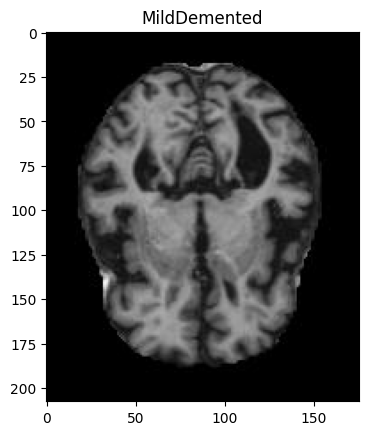

In [7]:
# Display the loaded image using Matplotlib
plt.imshow(im)  # Display the image
plt.title('MildDemented')  # Set the title of the plot
plt.show()  # Show the plot

In [8]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\asem\Desktop\DL


In [9]:
import glob

# This should print a list of image files if the path is correct
print(glob.glob(os.path.join(data_dir, '*/*.jpg')))  # Adjust the pattern if your images have a different extension


['train\\MildDemented\\mildDem0.jpg', 'train\\MildDemented\\mildDem1.jpg', 'train\\MildDemented\\mildDem10.jpg', 'train\\MildDemented\\mildDem100.jpg', 'train\\MildDemented\\mildDem101.jpg', 'train\\MildDemented\\mildDem102.jpg', 'train\\MildDemented\\mildDem103.jpg', 'train\\MildDemented\\mildDem104.jpg', 'train\\MildDemented\\mildDem105.jpg', 'train\\MildDemented\\mildDem106.jpg', 'train\\MildDemented\\mildDem107.jpg', 'train\\MildDemented\\mildDem108.jpg', 'train\\MildDemented\\mildDem109.jpg', 'train\\MildDemented\\mildDem11.jpg', 'train\\MildDemented\\mildDem110.jpg', 'train\\MildDemented\\mildDem111.jpg', 'train\\MildDemented\\mildDem112.jpg', 'train\\MildDemented\\mildDem113.jpg', 'train\\MildDemented\\mildDem114.jpg', 'train\\MildDemented\\mildDem115.jpg', 'train\\MildDemented\\mildDem116.jpg', 'train\\MildDemented\\mildDem117.jpg', 'train\\MildDemented\\mildDem118.jpg', 'train\\MildDemented\\mildDem119.jpg', 'train\\MildDemented\\mildDem12.jpg', 'train\\MildDemented\\mildDem12

In [10]:

#building data pipline
data = tf.keras.utils.image_dataset_from_directory(
    "train",
)

Found 5121 files belonging to 4 classes.


In [11]:
# make the data pipline able to iterator
data_iter = data.as_numpy_iterator()

In [12]:
# access data , every time run this will go next batch
batch = data_iter.next()

In [13]:
# 2 means : 1  image and 1 labels
len(batch)

2

0 = MildDemented <br>
1 = ModerateDemented  <br>
2 = NonDemented  <br>
3 = VeryMildDemented  <br> <br>
This is how the  " tf.keras.utils.image_dataset_from_directory" will labeled the data based on alphabetical order from the folder

In [14]:
# image as numpy array
print('shape: ',batch[0].shape)
print('labels: ',batch[1])

shape:  (32, 256, 256, 3)
labels:  [2 0 1 2 3 2 2 0 0 2 2 2 3 3 2 3 3 0 2 2 2 3 3 2 3 2 0 2 3 2 2 0]


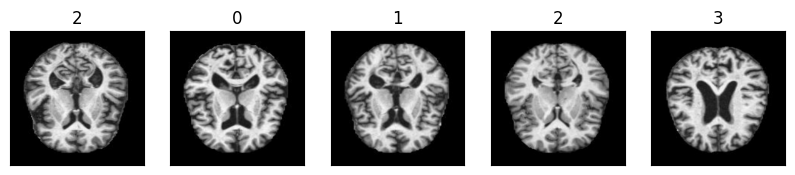

In [15]:
plot_batch(batch)

# Prerocess the data

scale the data

In [16]:
# x mean the imgage , y is the target 
scaled_data = data.map(lambda x,y: (x/255,y))

In [17]:
batch_scaled = scaled_data.as_numpy_iterator().next()

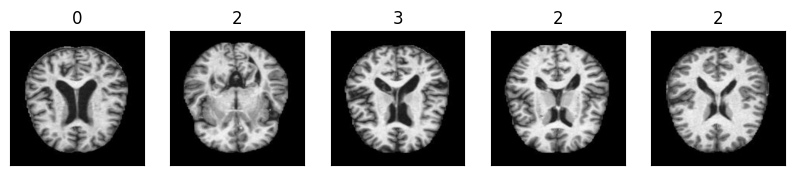

In [18]:
## after scaling 
fig, ax = plt.subplots(ncols=5,figsize=(10,9))
for ind, img in enumerate(batch_scaled[0][:5]):
    ax[ind].imshow(img)
    ax[ind].title.set_text(batch_scaled[1][ind])
    ax[ind].set_xticks([]) 
    ax[ind].set_yticks([]) 

In [19]:
#number of batch each batch has 32 
len(scaled_data)

161

Split the data to train is 70% val is 20% the test is 10%

In [20]:
train_size = int(len(scaled_data )* 0.7)
val_size = int(len(scaled_data)* 0.2)
test_size = int(len(scaled_data)* 0.1)+1
train_size+val_size+test_size

161

Partitioning the Dataset

In [21]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

## Build Deep Learning model

In [22]:
# Initialize a Sequential model
model = Sequential()

# Add the first convolutional layer with 16 filters, a kernel size of (3,3), ReLU activation, and input shape (256,256,3)
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
# Add a max pooling layer
model.add(MaxPooling2D())

# Add the second convolutional layer with 32 filters, a kernel size of (3,3), and ReLU activation
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D())

# Add the third convolutional layer with 16 filters, a kernel size of (3,3), and ReLU activation
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu'))
# Add another max pooling layer
model.add(MaxPooling2D())

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add a fully connected (dense) layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add the output layer with 4 units (one for each class) and softmax activation for multi-class classification
model.add(Dense(4, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [25]:
logsdir ='logs' 

In [26]:
tf_callback  = tf.keras.callbacks.TensorBoard(log_dir=logsdir)

# Traning the model

In [27]:
hist= model.fit(train,epochs=20,validation_data=val, callbacks=[tf_callback])

Epoch 1/20


112/112 [==============================] - 19s 162ms/step - loss: 1.0187 - sparse_categorical_accuracy: 0.5165 - val_loss: 0.9137 - val_sparse_categorical_accuracy: 0.5527
Epoch 2/20
112/112 [==============================] - 18s 159ms/step - loss: 0.8413 - sparse_categorical_accuracy: 0.6158 - val_loss: 0.6660 - val_sparse_categorical_accuracy: 0.7139
Epoch 3/20
112/112 [==============================] - 17s 155ms/step - loss: 0.5038 - sparse_categorical_accuracy: 0.7896 - val_loss: 0.4036 - val_sparse_categorical_accuracy: 0.8320
Epoch 4/20
112/112 [==============================] - 18s 161ms/step - loss: 0.2157 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.2681 - val_sparse_categorical_accuracy: 0.8955
Epoch 5/20
112/112 [==============================] - 18s 156ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0.9548 - val_loss: 0.1754 - val_sparse_categorical_accuracy: 0.9336
Epoch 6/20
112/112 [==============================] - 18s 156ms/step - loss: 0.0610

In [28]:
hist.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

## Plot the Performnace

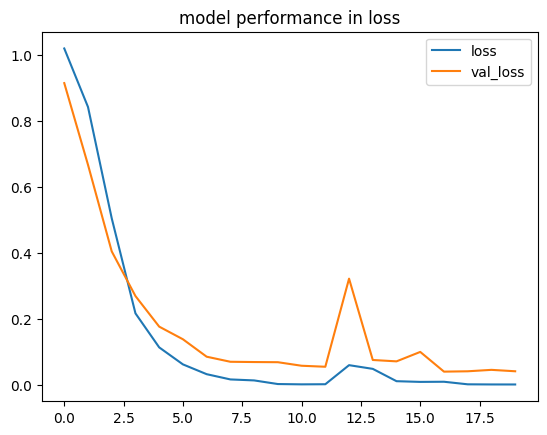

In [29]:
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model performance in loss')
plt.legend()
plt.show()

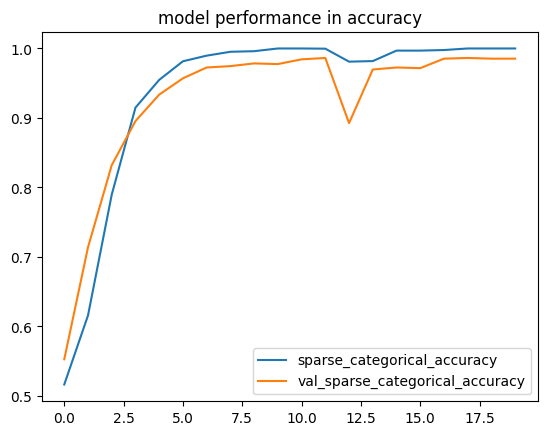

In [30]:
plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='val_sparse_categorical_accuracy')
plt.title('model performance in accuracy')
plt.legend()
plt.show()

## Evaluate the model performance

In [31]:
pre, re, acc = Precision(), Recall() , SparseCategoricalAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch 
    yhat = model.predict(X)
    pre.update_state(y,np.argmax(yhat,axis=1))
    re.update_state(y,np.argmax(yhat,axis=1))
    acc.update_state(y,yhat)



1/1 [==============================] - 0s 60ms/step


In [32]:
print(f'Precision:{pre.result().numpy()} \nRecall:{re.result().numpy()} \nAccuracy:{acc.result().numpy()}')

Precision:0.9976958632469177 
Recall:1.0 
Accuracy:0.9863547682762146


### Testing on new Data

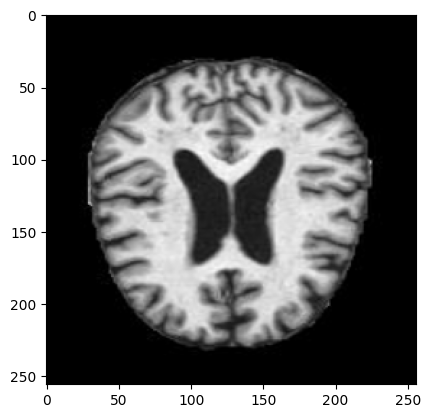

In [33]:
img = cv2.imread('./test/VeryMildDemented/26 (44).jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


 expand the dimension becusue the model only exept batch of images
 so we encapsolaute it 

In [34]:
print('Before expands :',resize.shape)
print('After expands :',np.expand_dims(resize,0).shape)

Before expands : (256, 256, 3)
After expands : (1, 256, 256, 3)


Scale the image

0 = MildDemented <br>
1 = ModerateDemented  <br>
2 = NonDemented  <br>
3 = VeryMildDemented  <br>


In [35]:
yhat = model.predict(np.expand_dims(resize/255,0))
print('Model predict : ',np.argmax(yhat))

1/1 [==============================] - 0s 18ms/step
Model predict :  3
